/Users/atulkumar/miniconda3/envs/bro/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/atulkumar/miniconda3/envs/bro/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/atulkumar/miniconda3/envs/bro/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize(

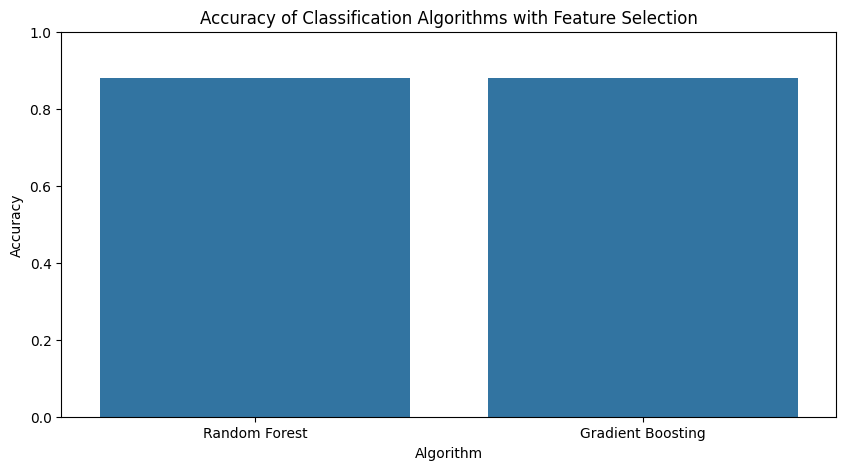

Random Forest Classifier Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
         200       1.00      1.00      1.00         2
         295       1.00      1.00      1.00         1
         300       1.00      1.00      1.00         2
         350       1.00      1.00      1.00         4
         400       1.00      1.00      1.00         4
         440       1.00      1.00      1.00         3
         445       1.00      1.00      1.00         1
         450       1.00      1.00      1.00         7
         460       1.00      1.00      1.00         1
         475       1.00      1.00      1.00         1
         500       1.00      1.00      1.00         9
         510       1.00      1.00      1.00         1
         540       1.00      1.00      1.00         2
         550       1.00      1.00      1.00     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

# Load dataset
crop_data = pd.read_csv('crop_data.csv')

# Data Preprocessing Techniques
# Technique 1: Handling missing values
numeric_columns = crop_data.select_dtypes(include=['float64', 'int64']).columns
crop_data[numeric_columns] = crop_data[numeric_columns].fillna(crop_data[numeric_columns].mean())

# Technique 2: Feature scaling (excluding non-numeric columns)
numeric_columns = crop_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(crop_data[numeric_columns])
crop_data_scaled = pd.DataFrame(scaled_features, columns=numeric_columns)

# Splitting the dataset into features and target variable
X = crop_data_scaled
y = crop_data['CROP_PRICE']  # Replace 'CROP_PRICE' with the actual name of your target variable column

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection
# Using Random Forest Classifier to select important features
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]

# Retaining only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Classification Algorithms with Feature Selection
# Algorithm 1: Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_selected, y_train)
rf_predictions = rf_classifier.predict(X_test_selected)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_report = classification_report(y_test, rf_predictions)

# Algorithm 2: Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train_selected, y_train)
gb_predictions = gb_classifier.predict(X_test_selected)
gb_accuracy = accuracy_score(y_test, gb_predictions)
gb_report = classification_report(y_test, gb_predictions)

# Visualizing results with Feature Selection
# Compare accuracy of classifiers
plt.figure(figsize=(10, 5))
sns.barplot(x=['Random Forest', 'Gradient Boosting'], 
            y=[rf_accuracy, gb_accuracy])
plt.title('Accuracy of Classification Algorithms with Feature Selection')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Compare classification reports with Feature Selection
print("Random Forest Classifier Report:")
print(rf_report)
print("\nGradient Boosting Classifier Report:")
print(gb_report)


In [3]:
df = pd.read_csv('crop_data.csv')

In [4]:
df

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper
...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Pumpkin
